## Risikoanalyse in Bezug auf Terroranschläge für international tätige Reiseunternehmen

## Inhaltsverzeichnis

[1. Einleitung](#1-einleitung)  
[2. Explorative Datenanalyse](#2-explorative-datenanalyse)  
[3. Unifying & Transformation](#3-unifying--transformation)  
[4. Data Cleansing](#4-data-cleansing)  
[5. Analysis & Validation](#5-analysis--validation)  
[6. Feature Selection & Engineering](#6-feature-selection--engineering)  
[7. Anwendung in Machine Learning](#7-anwendung-in-machine-learning)  
[8. Anwendung von XAI - Techniken](#8-anwendung-von-xai---techniken)  
[9. Fazit](#9-fazit)  
[10. Quellenverzeichnis](#10-quellenverzeichnis)

## 1. Einleitung

<u>Projektmitglieder:</u>

Elias Wolfsberger (wolfseli@students.zhaw.ch), Oliver Brennwald (brennoli@students.zhaw.ch), Florian Rieser (rieseflo@students.zhaw.ch)<br><br>

<u>Datenquelle:</u>

Global terrorism database (START, 2022)<br><br>

<u>Problem- & Fragestellung:</u>

Angesichts der wachsenden globalen Unsicherheiten und der Bedrohung durch Terrorismus sehen sich Reisebüros mit der Aufgabe konfrontiert, ihre Kunden über potenzielle Risiken zu informieren. Terroranschläge können nicht nur die Sicherheit von Reisen beeinträchtigen, sondern auch das Vertrauen der Reisenden in bestimmte Reiseziele untergraben. Vor diesem Hintergrund stellt sich die zentrale Frage: Wie können wir mithilfe der Global Terrorism Database (GTD) und moderner Machine-Learning-Technologien ein Prognosemodell entwickeln, das mögliche terroristische Angriffe in verschiedenen Regionen vorhersagt und den Reisebüros hilft, informierte Entscheidungen zu treffen, um ihre Kunden besser zu schützen?<br><br>

<u>Zielsetzung:</u>

Das Hauptziel dieses Projekts besteht darin, ein präzises und effektives Prognosemodell zu entwickeln, das auf der Analyse von Daten aus der Global Terrorism Database basiert. Dieses Modell wird darauf abzielen, Muster und Trends in Bezug auf terroristische Aktivitäten zu identifizieren und Vorhersagen über zukünftige Angriffe zu treffen. Durch die Bereitstellung dieser Informationen wollen wir Reisebüros einen signifikanten Mehrwert bieten, indem sie proaktive Massnahmen zur Risikominderung ergreifen können. Das letztliche Ziel besteht darin, die Sicherheit und das Vertrauen der Reisenden zu fördern, indem eine fundierte Entscheidungsgrundlage geschaffen wird.<br><br>

<u>Vorgehen & Methoden:</u>

1. Explorative Datenanalyse 

2. Unifying & Transformation

3. Data Cleansing

4. Analysis & Validation

5. Feature Selection & Engineering

6. Anwendung in Machine Learning

7. Anwendung von XAI - Techniken

## 2. Explorative Datenanalyse

In [3]:
# Importe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Daten laden im ordner data
df = pd.read_excel('data/globalterrorismdb_0522dist.xlsx')

# Daten anzeigen
print(df.head())

# info über die Daten
print(df.info())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [6]:
# Statistische Zusammenfassung der numerischen Daten
print(df.describe())

# Fehlende Werte prüfen
print(df.isnull().sum())

# Fehlende Werte beheben
df.fillna(value=0, inplace=True)

            eventid          iyear         imonth           iday  \
count  2.097060e+05  209706.000000  209706.000000  209706.000000   
mean   2.004867e+11    2004.800993       6.455285      15.527930   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.992080e+11    1992.000000       4.000000       8.000000   
50%    2.012010e+11    2012.000000       6.000000      15.000000   
75%    2.015123e+11    2015.000000       9.000000      23.000000   
max    2.020123e+11    2020.000000      12.000000      31.000000   
std    1.351933e+09      13.519321       3.387098       8.801104   

            extended                     resolution        country  \
count  209706.000000                           4861  209706.000000   
mean        0.051525  2006-12-14 11:22:40.581978880     130.291351   
min         0.000000            1970-03-08 00:00:00       4.000000   
25%         0.000000            1997-05-22 00:00:00      69.000000   
50%         0.000000            2013-

C:\Users\elias\AppData\Local\Temp\ipykernel_22580\3178013130.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(value=0, inplace=True)


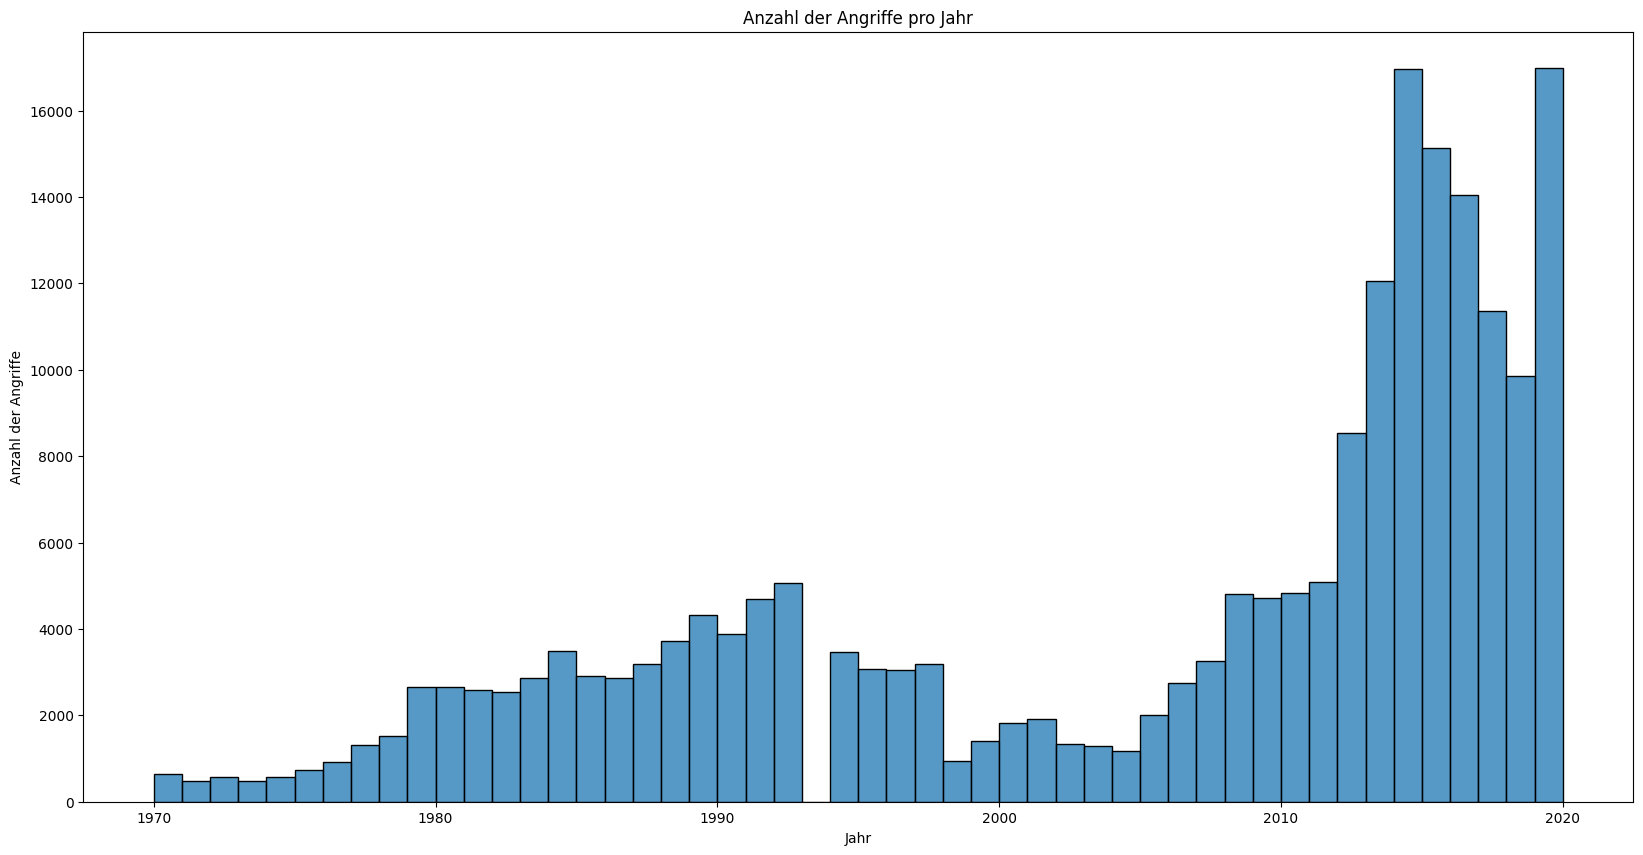

In [7]:
# histogramm der Anzahl der Angriffe pro Jahr
plt.figure(figsize=(20,10))
sns.histplot(df['iyear'], bins=50, kde=False)
plt.title('Anzahl der Angriffe pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Angriffe')
plt.show()

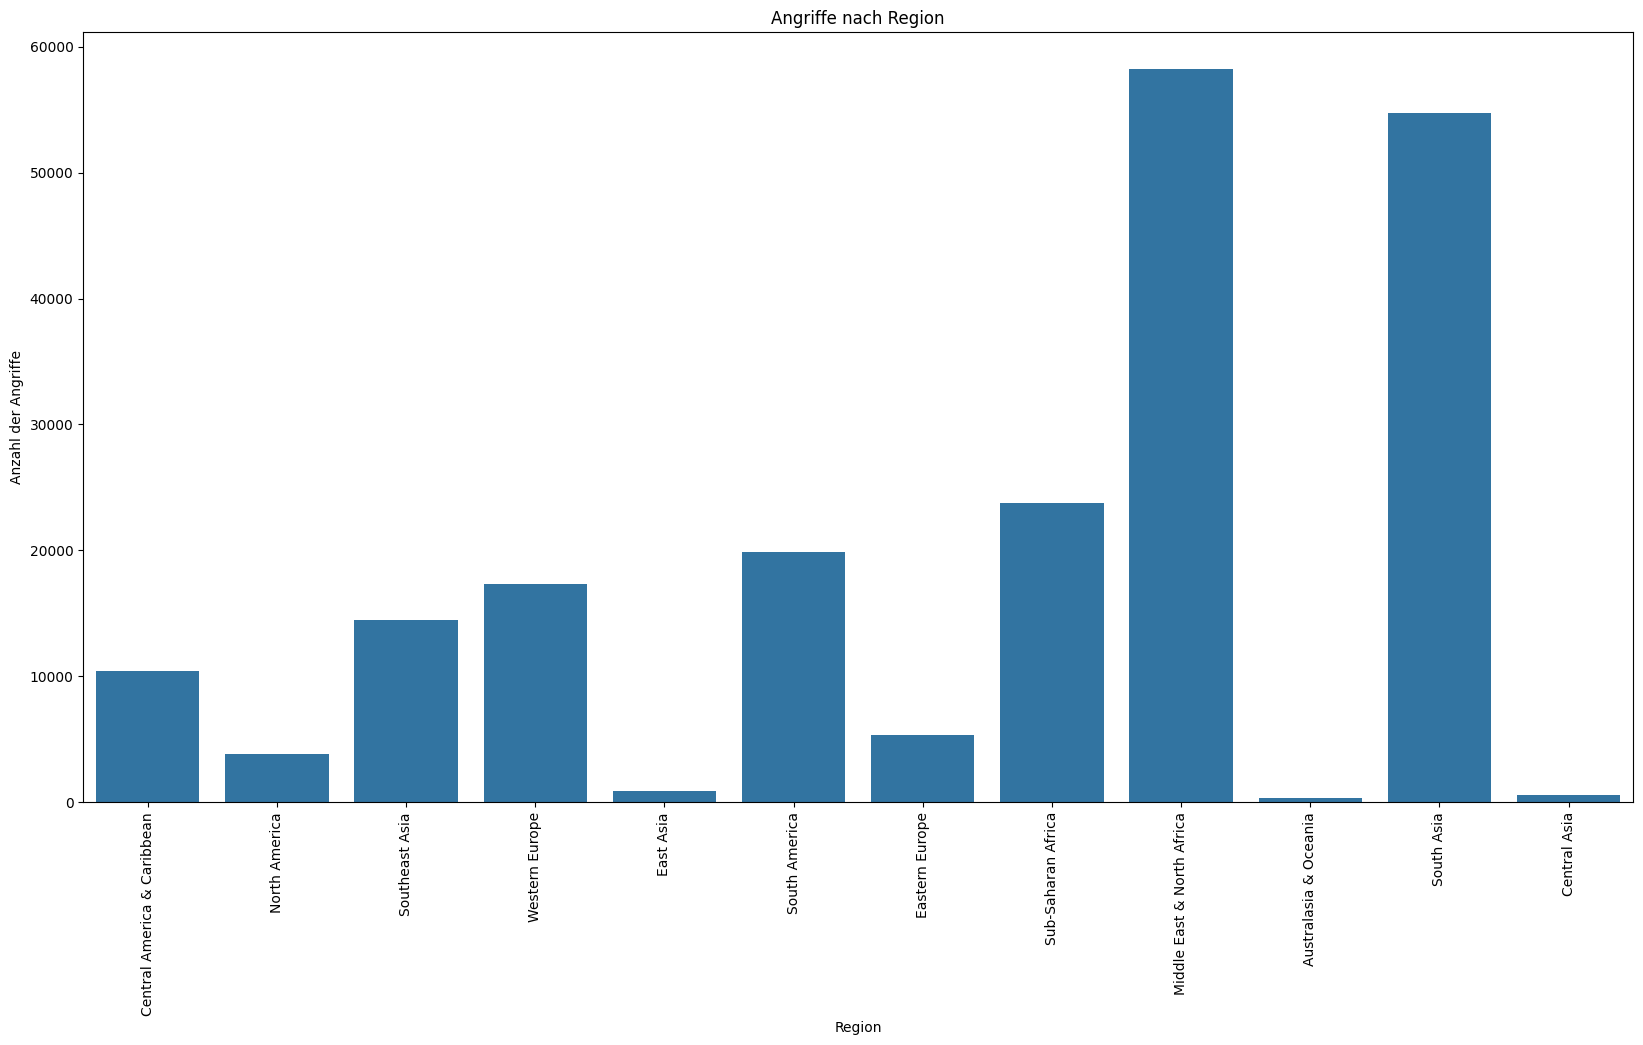

In [8]:
# Angriffe nach Region
plt.figure(figsize=(20,10))
sns.countplot(x='region_txt', data=df)
plt.title('Angriffe nach Region')   
plt.xlabel('Region')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


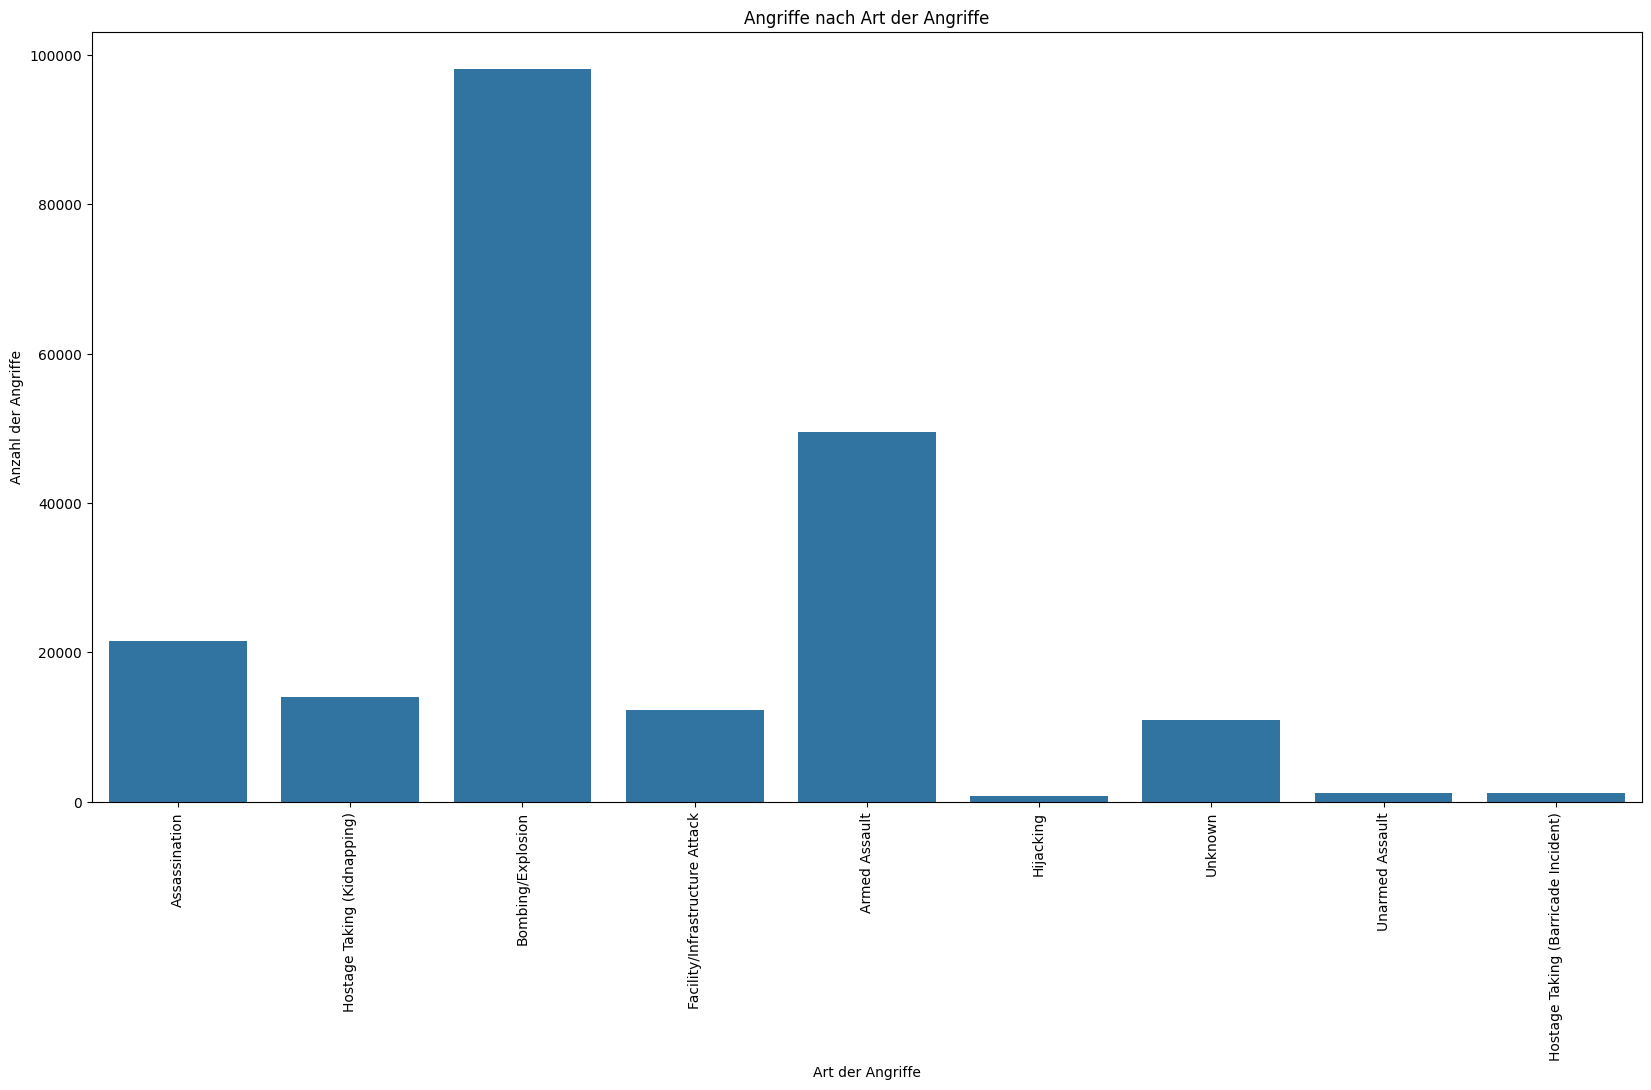

In [9]:
# Angriffe nach Art der Angriffe
plt.figure(figsize=(20,10))
sns.countplot(x='attacktype1_txt', data=df)
plt.title('Angriffe nach Art der Angriffe')
plt.xlabel('Art der Angriffe')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

## 3. Unifying & Transformation

## 4. Data Cleansing

## 5. Analysis & Validation

## 6. Feature Selection & Engineering

## 7. Anwendung in Machine Learning

## 8. Anwendung von XAI - Techniken

## 9. Fazit

## 10. Quellenverzeichnis

START (National Consortium for the Study of Terrorism and Responses to Terrorism) (2022). *Global Terrorism Database 1970 - 2020 [Data set].* https://www.start.umd.edu/gtd

